# Final Review

## 1 - Numerical Integrations

Use trapezoidal of Simpson's rules to compute the definite integral numerically.

### Exercise 1: Trapezoidal Rules

Consider the integral

$$ \int_a^b e^{-5x^2} dx $$

1. Write the formula to approximate the above integral using the trapezoidal rules with $n$ subintervals.

    $$ \int_a^b e^{-5x^2} dx \approx ? $$

$$
\begin{align*}
    \int_a^b e^{-5x^2} dx &\approx \frac{b - a}{2n} \sum^{n-1}_{i = 0} e^{-5x_i^2} + e^{-5x_{i+1}^2}, & x_i = \frac{b-a}{n} i
\end{align*}
$$

2. Write a function in Python to calculate this approximation with $n$ iterations.

In [2]:
import math

def trapezoid_approx(fx, a : float, b : float, n : int) -> float:
    total = 0
    width = b - a
    for i in range(n):
        x_i = width * i / n
        x_next = width * (i + 1) / n
        total += fx(x_i) + fx(x_next)
    return total * width / (2 * n)

In [3]:
def fx(x : float) -> float:
    return math.exp(-5 * x**2)

a = 0
b = 1
n = 100
trapezoid_approx(fx, a, b, n)

0.39571174818043486

3. Use the trapezoidal rules and determine the number of iterations to obtain the accuracy of the approximation up to 5 significant digits. Notice that the error can be estimated by

    $$ E_n \leq \frac{M(b-a)^3}{12n^2} $$

    where $M$ is the maximum of the absolute value of the second derivative $f''(x)$ on $[a, b]$. Once you obtain $n$, run your function again to get the new approximation for the integral.

$$
\begin{align*}
    E_n & \leq \frac{M(b - a)^3}{12n^2} \\
    10^{-5} &= \frac{M(b - a)^3}{12n^2} \\
    12n^2 * 10^{-5} &= M(b - a)^3 \\
    n^2 &= \frac{M(b - a)^3}{12 \times 10^{-5}} \\
    n &= \sqrt{\frac{M(b - a)^3}{12 \times 10^{-5}}}
\end{align*}
$$

In [4]:
import sympy as sp

x = sp.symbols("x")
fx_sp = sp.exp(-5 * x**2)

sp.diff(fx_sp, x, 1)

-10*x*exp(-5*x**2)

In [5]:
sp.diff(fx_sp, x, 2)

10*(10*x**2 - 1)*exp(-5*x**2)

In [6]:
sp.diff(fx_sp, x, 3)

100*x*(3 - 10*x**2)*exp(-5*x**2)

In [7]:
sp.diff(fx_sp, x, 4)

100*(100*x**4 - 60*x**2 + 3)*exp(-5*x**2)

$$
\begin{align*}
    f(x) &= e^{-5x^2} \\
    f'(x) &= -10xe^{-5x^2} \\
    f''(x) &= 100x^2e^{-5x^2} - 10e^{-5x^2} \\
    f'''(x) &= 300xe^{-5x^2} - 1000x^3e^{-5x^2} \\
    f^{(4)}(x) &= 10000x^4e^{-5x^2} - 6000x^2e^{-5x^2} + 300e^{-5x^2}
\end{align*}
$$

$$
\begin{align*}
    f'''(x) = 0 &= 300xe^{-5x^2} - 1000x^3e^{-5x^2} \\
    1000x^3e^{-5x^2} &= 300xe^{-5x^2} \\
    \frac{10}{3}x^2 &= 1 \\
    x &= \pm \sqrt{\frac{3}{10}}
\end{align*}
$$

$$
\begin{align*}
    f^{(4)}(x) &= 10000x^4e^{-5x^2} - 6000x^2e^{-5x^2} + 300e^{-5x^2} \\
    &= 10000\left(\frac{9}{100}\right)e^{-\frac{3}{2}} - 6000\left(\frac{3}{10}\right)e^{-\frac{3}{2}} + 300e^{-\frac{3}{2}} \\
    &= 900e^{-\frac{3}{2}} - 1800e^{-\frac{3}{2}} + 300e^{-\frac{3}{2}} \\
    &= -1200e^{-\frac{3}{2}}
\end{align*}
$$

This is positive, so $\sqrt{\frac{3}{10}}$ is a maximum of the second derivative.

In [8]:
a = 0
b = 1
M = 0.3**0.5
n = math.ceil((M * (b - a)**3 / (12 * 10e-5))**0.5)
trapezoid_approx(fx, a, b, n)

0.3957007363966643

### Exercise 2: Simpson's Rules

Consider the integral

$$ \int_0^{\pi} \sin(e^x) dx $$

Determine the number of iterations $n$ to obtain the accuracy of the Simpson's approximation up to 5 significant digits. Notice that the error can be estimated by

$$ E_n \leq \frac{M(b - a)^5}{180n^4} $$

where $M$ is the maximum of the absolute value of the 4th derivative of $f^{(4)}(x)$ on $[a, b]$.

### Exercise 3: Computing an Integral Using Two Approaches

In this exercise, you will compute the integral of a function using two distinct approaches: a pure Python loop and NumPy’s vectorized operations. The objective is to compare the efficiency of both methods in terms of execution time. You will integrate the function $f(x) = \sin(x^2)$ over the interval
$[0, 2]$. We will only use the trapezoidal rule for the numerical integral in this problem.

#### Task 1: Pure Python Loop

Write a function using pure Python loops to compute the integral:

$$ \int_0^2 \sin(x^2) dx $$

In [9]:
import time

def loop_trapz_int(f, a, b, n):
    start_time = time.time()
    int_val = 0

    width = b - a
    for i in range(n):
        xi = a + width * i / n
        x_next = a + width * (i + 1) / n
        int_val += f(xi) + f(x_next)
    int_val *= width / (2 * n)

    end_time = time.time()
    computed_time = end_time - start_time
    return int_val, computed_time

In [10]:
import math

def f_loop(x):
    return math.sin(x**2)

a = 0
b = 2
n = 1000

int_val, computed_time = loop_trapz_int(f_loop, a, b, n)
print(f'Integral approximation: {int_val}, computed time: {computed_time} seconds')

Integral approximation: 0.8047756178175947, computed time: 0.003964900970458984 seconds


#### Task 2: NumPy Vectorization

In [11]:
import numpy as np
import time

def np_trapz_int(f, a, b, n):
    start_time = time.time()

    x = np.linspace(a, b, n+1)
    areas = (f(x[:-1]) + f(x[1:])) / 2
    int_val = areas.sum() * (b - a) / n

    end_time = time.time()
    computed_time = end_time - start_time
    return int_val, computed_time

In [12]:
def f_np(x):
    return np.sin(x**2)

a = 0
b = 2
n = 1000

int_val, computed_time = np_trapz_int(f_np, a, b, n)
print(f'Integral approximation: {int_val}, computed time: {computed_time} seconds')

Integral approximation: 0.8047756178175949, computed time: 0.0 seconds


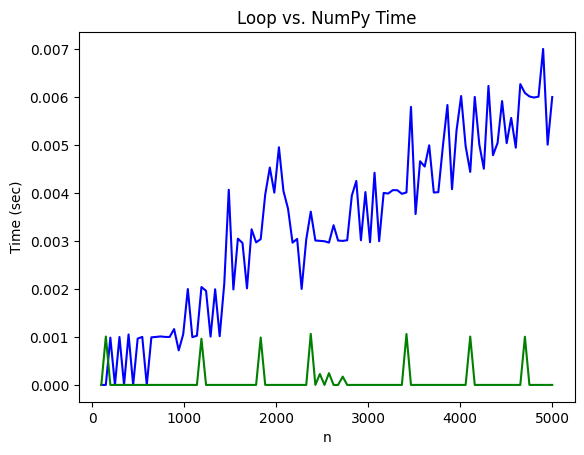

In [13]:
import matplotlib.pyplot as plt

n_values = np.linspace(100, 5000, 100, dtype=int)
loop_values = [loop_trapz_int(f_loop, a, b, n)[1] for n in n_values]
np_values = [np_trapz_int(f_np, a, b, n)[1] for n in n_values]

plt.plot(n_values, loop_values, label="Loop Times", color='blue')
plt.plot(n_values, np_values, label="NumPy Times", color='green')
plt.title("Loop vs. NumPy Time")
plt.xlabel("n")
plt.ylabel("Time (sec)")
plt.show()

## 2 - Finding Roots

Find the roots of a function using the Newton-Raphson method.

Consider the equation

$$ x^3 + x - \lambda = 0 $$

where $\lambda$ is a positive real number.

1. Determine the Newton iteration function and the iterative formula to compute $x_{n+1}$ in terms of $x_n$. For instance

    $$ x_{n+1} = \frac{x_n}{2} + \frac{5}{2x_n} $$

    is the iterative formula for Newton method to compute the square root of 5.

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

$$ f(x) = x^3 + x - \lambda $$

$$ f'(x) = 3x^2 + 1 $$

$$ x_{n+1} = x_n - \frac{x_n^3 + x_n - \lambda}{3x_n^2 + 1} $$

2. Write a function in Python to find the root of the equation with random $\lambda \in (1, 15)$.

In [14]:
def newton_raphson(f, df, lamb, n, initial_guess):
    xn = initial_guess
    for _ in range(n):
        xn = xn - f(xn, lamb) / df(xn)
    return xn

In [15]:
import random

def fx(x, lamb):
    return x**3 + x - lamb

def dfx(x):
    return 3 * x**2 + 1

initial_guess = 2
a = 1
b = 15
lamb = random.uniform(a, b)
n = 100

lamb, newton_raphson(fx, dfx, lamb, n, initial_guess)

(1.7941293443971023, 0.9464174813819888)

## 3 - Polynomial Interpolations

Utilize the Vandermonde matrix and polynomial interpolation to find the interpolating polynomial that passes through the given points. Additionally, plot the resulting polynomial and points for visualization.

Consider the points (-2, 5), (-1, -2), (0, 1), (2, 3), (3, 0).
- Use the Vandermonde matrix method to find the coefficients of the interpolating polynomial $p(x)$ that passes through the given points.
- Plot the resulting polynomial and given points.

In [16]:
x_values = [-2, -1, 0, 2, 3]
y_values = [5, -2, 1, 3, 0]
vandermonde_matrix = np.vander(x_values)
a, b, c, d, e = np.linalg.solve(vandermonde_matrix, y_values)

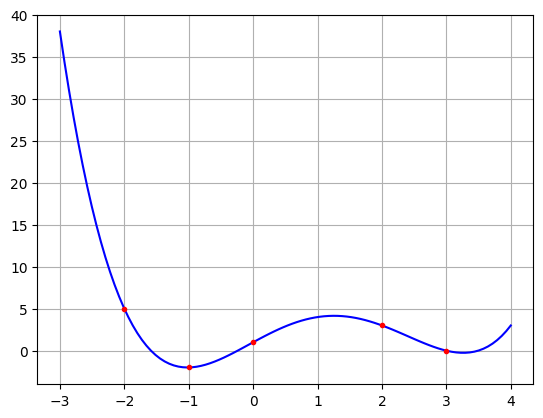

In [17]:
def p(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

px_values = np.linspace(-3, 4, 100)
py_values = p(px_values, a, b, c, d, e)

plt.plot(px_values, py_values, 'b-')
plt.plot(x_values, y_values, 'r.')
plt.grid(True)
plt.show()

## 4 - Singular Value Decomposition

### Exercise 1: Manual SVD

- Generate a random $4 \times 6$ matrix $A$ of integers.
- Compute $AA^T$ to find the left singular vectors and singular values.
- Construct the matrix $U$ and $\Sigma$ from the eigenvectors and eigenvalues, respectively.
- Determine the right singular vectors to form the matrix $V^T$.
- Implement a Python function that performs these steps and returns $U$, $\Sigma$, and $V^T$.

In [38]:
def manual_svd(A):
    
    # Find U
    AAT = A @ A.T
    left_eigenvalues, left_eigenvectors = np.linalg.eig(AAT)
    sorted_idx = left_eigenvalues.argsort()[::-1]
    left_eigenvalues = left_eigenvalues[sorted_idx]
    U = left_eigenvectors[:, sorted_idx]

    # Find Sigma
    Sigma = np.zeros(A.shape)
    for i in range(min(A.shape)):
        Sigma[i, i] = np.sqrt(left_eigenvalues[i])

    # Find VT
    ATA = A.T @ A
    right_eigenvalues, right_eigenvectors = np.linalg.eig(ATA)
    sorted_idx = right_eigenvalues.argsort()[::-1]
    VT = right_eigenvectors[:, sorted_idx]

    return U, Sigma, VT

In [39]:
A = np.random.randint(-10, 10, size=(4, 6))

manual_svd(A)

(array([[ 0.54370726, -0.30360853,  0.16199804, -0.76548083],
        [-0.55699095,  0.56662191,  0.10722147, -0.59766566],
        [-0.46709267, -0.55394987,  0.68835584,  0.03361877],
        [ 0.41948532,  0.52905672,  0.69887512,  0.23601829]]),
 array([[20.75500115,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , 16.37225388,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        , 11.95620695,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  4.92222972,  0.        ,
          0.        ]]),
 array([[ 0.03800108,  0.22214106, -0.30586555, -0.60187966, -0.66950065,
          0.34717419],
        [ 0.23676044, -0.7527406 , -0.18638099,  0.01392015, -0.31933239,
         -0.41315208],
        [-0.1357771 ,  0.08711393, -0.91586425,  0.06923285,  0.35239424,
         -0.15029991],
        [ 0.40865414,  0.32612807, -0.14573869,  0.71874382, -0.43123

### Exercise 2: Numerical Solution of Differential Equations

In [65]:
def rk4(fx, t0, y0, t_end, h, a, b):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < t_end:
        k1 = fx(y, a, b)
        k2 = fx(y + h*k1/2, a, b)
        k3 = fx(y + h*k2/2, a, b)
        k4 = fx(y + h*k3, a, b)
        t += h
        y = y + (k1 + 2*k2 + 2*k3 + k4) * h/6
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

In [66]:
def f(y, a, b):
    A = np.array([[a, -b], [a, b]])
    return A @ y

t0 = 0
y0 = np.array([0.5, 0.8])
t_end = 10
h = 0.1

a, b = -5, 3

t_values, y_values = rk4(f, t0, y0, t_end, h, a, b)

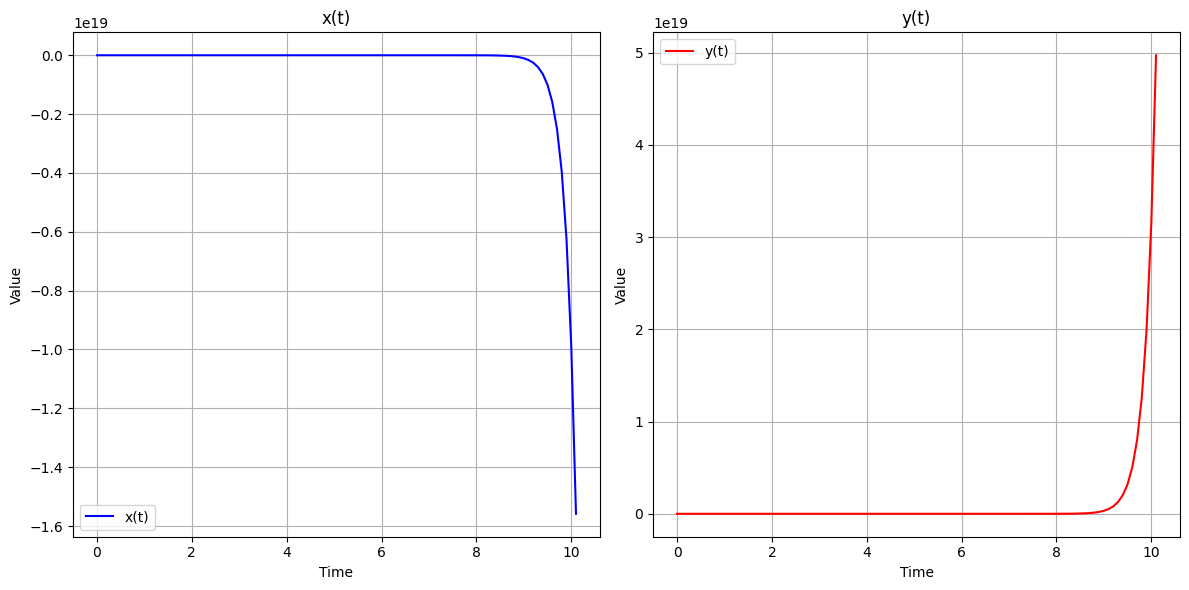

In [69]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot x(t)
axs[0].plot(t_values, y_values[:, 0], label="x(t)", color="blue")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Value")
axs[0].set_title("x(t)")
axs[0].legend()
axs[0].grid(True)

# Plot y(t)
axs[1].plot(t_values, y_values[:, 1], label="y(t)", color="red")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Value")
axs[1].set_title("y(t)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [71]:
def manual_svd(A):

    AAT = A @ A.T
    left_eigenvalues, left_eigenvectors = np.linalg.eig(AAT)
    sorted_idx = left_eigenvalues.argsort()[::-1]
    left_eigenvectors = left_eigenvectors[:, sorted_idx]
    U = left_eigenvectors

    Sigma = np.zeros(A.shape)
    left_eigenvalues = left_eigenvalues[sorted_idx]
    for i in range(min(A.shape)):
        Sigma[i, i] = np.sqrt(left_eigenvalues[i])   

    ATA = A.T @ A
    right_eigenvalues, right_eigenvectors = np.linalg.eig(ATA)
    sorted_idx = right_eigenvalues.argsort()[::-1]
    right_eigenvectors = right_eigenvectors[:, sorted_idx]
    VT = right_eigenvectors

    return U, Sigma, VT

In [72]:
A = np.random.randint(-10, 10, size=(4, 6))

manual_svd(A)

(array([[-0.79119478, -0.3524494 , -0.37343641, -0.33216786],
        [ 0.20730103, -0.75791054,  0.54170287, -0.29858986],
        [ 0.34955566, -0.53088641, -0.63283269,  0.44214618],
        [ 0.45699884,  0.13968057, -0.40819852, -0.77782733]]),
 array([[20.27842613,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , 18.78315667,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        , 12.50738694,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  2.92296623,  0.        ,
          0.        ]]),
 array([[-0.36876107+0.j        ,  0.25236454+0.j        ,
          0.21072831+0.j        , -0.44143504+0.j        ,
          0.11810287+0.17634207j,  0.11810287-0.17634207j],
        [ 0.5022564 +0.j        ,  0.15523168+0.j        ,
         -0.40542324+0.j        ,  0.07800957+0.j        ,
         -0.56843723+0.13815502j, -0.56843723-0.13815502j],
    